In [33]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os


In [34]:
# Generate random graph
file_path = vg.generate_random_graph(50, seed=23)
adj_matrix = np.loadtxt(file_path, delimiter=",")

file_path2 = vg.generate_weight_matrix(50,weight_range=(7,89), seed=23)
weight_matrix = np.loadtxt(file_path2, delimiter=",")
col=[]
for i in range(50):
    col.append(i)

node_labels = {i: label for i, label in enumerate(col)}



Generating graph: 100%|██████████| 50/50 [00:00<00:00, 18147.73it/s]


In [35]:

    # Convert adjacency matrix to dataset
graph_dataset = cs.GraphDataset(adj_matrix)
# graph_dataset = cs.GraphDataset(adj_matrix, weight_matrix)  # Include weight matrix
data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

    # Define model parameters
num_layers = 2
d_model = 128
num_heads = 8
d_feedforward = 512
input_dim = len(adj_matrix[0])

  

In [36]:
  # Initialize model, loss function, and optimizer
model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
# model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim, use_weights=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
top_nodes = vg.find_top_nodes(adj_matrix, num_nodes=5)


The top 5 nodes with the greatest number of strong correlations are: [18, 19, 31, 8, 9]


In [37]:

    # Train the model
num_epochs = 10
cs.train_model(model, data_loader, criterion, optimizer, num_epochs)


    # Predict recommendations for a specific node
node_index = 2   #target node
recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=5, threshold=0.5)
print(f"Recommended nodes for node {node_index}: {recommended_nodes}")




Epoch 1/10, Loss: 0.24217936396598816
Epoch 2/10, Loss: 0.2048855870962143
Epoch 3/10, Loss: 0.1505630761384964
Epoch 4/10, Loss: 0.16663672029972076
Epoch 5/10, Loss: 0.1415393352508545
Epoch 6/10, Loss: 0.1269809901714325
Epoch 7/10, Loss: 0.08840909600257874
Epoch 8/10, Loss: 0.07409597188234329
Epoch 9/10, Loss: 0.07084515690803528
Epoch 10/10, Loss: 0.061348266899585724
Recommended nodes for node 2: [46, 11, 40, 42, 25]


In [38]:
    # Draw the graph in 3D
# vg.draw_graph_3d(adj_matrix, top_nodes, recommended_nodes,transparent_labeled=False,edge_weights=weight_matrix,node_labels=node_labels)



In [39]:
# print(jaccard)
aaj,aaj2 = cs.aaj_accuracy(adj_matrix,node_index,recommended_nodes)
print("Average Jaccard Score:",aaj)
print("Average Adam/Adar Score:",aaj2)

def test_scores_for_different_seeds(seeds, node_index=2, num_nodes=50, top_k=5, num_epochs=100):
    jaccard_scores = []
    adamic_adar_scores = []

    for seed in seeds:
        # Generate random graph
        file_path = vg.generate_random_graph(num_nodes, seed=seed)
        adj_matrix = np.loadtxt(file_path, delimiter=",")

        # Convert adjacency matrix to dataset
        graph_dataset = cs.GraphDataset(adj_matrix)
        data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

        # Define model parameters
        num_layers = 2
        d_model = 128
        num_heads = 8
        d_feedforward = 512
        input_dim = len(adj_matrix[0])

        # Initialize model, loss function, and optimizer
        model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

        # Predict recommendations for a specific node
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)

        # Calculate scores
        aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
        jaccard_scores.append(aaj)
        adamic_adar_scores.append(aaj2)

    return jaccard_scores, adamic_adar_scores


Average Jaccard Score: 0.20345543345543343
Average Adam/Adar Score: 2.2515156757454013


In [43]:
# Generate 500 unique random seeds
seeds = random.sample(range(10000), 10)   # Example seeds: 10, 20, 30, 40, 50
# seeds = (10,102,241,234,123,324)   # Example seeds: 10, 20, 30, 40, 50


# Test scores
jaccard_scores, adamic_adar_scores = test_scores_for_different_seeds(seeds)


Generating graph: 100%|██████████| 50/50 [00:00<00:00, 29776.40it/s]


Epoch 1/100, Loss: 0.2279559075832367
Epoch 2/100, Loss: 0.17066441476345062
Epoch 3/100, Loss: 0.20935067534446716
Epoch 4/100, Loss: 0.13105356693267822
Epoch 5/100, Loss: 0.10614483803510666
Epoch 6/100, Loss: 0.13483291864395142
Epoch 7/100, Loss: 0.09127672016620636
Epoch 8/100, Loss: 0.06890270113945007
Epoch 9/100, Loss: 0.07459203898906708
Epoch 10/100, Loss: 0.05930478870868683
Epoch 11/100, Loss: 0.046219900250434875
Epoch 12/100, Loss: 0.041859958320856094
Epoch 13/100, Loss: 0.032870158553123474
Epoch 14/100, Loss: 0.0321221761405468
Epoch 15/100, Loss: 0.02575102634727955
Epoch 16/100, Loss: 0.024793339893221855
Epoch 17/100, Loss: 0.023745808750391006
Epoch 18/100, Loss: 0.021492179483175278
Epoch 19/100, Loss: 0.02289547026157379
Epoch 20/100, Loss: 0.0254156906157732
Epoch 21/100, Loss: 0.01760885678231716
Epoch 22/100, Loss: 0.026503385975956917
Epoch 23/100, Loss: 0.022944891825318336
Epoch 24/100, Loss: 0.020247509703040123
Epoch 25/100, Loss: 0.014951100572943687
Ep

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 124682.05it/s]

Epoch 1/100, Loss: 0.23218420147895813
Epoch 2/100, Loss: 0.15034782886505127
Epoch 3/100, Loss: 0.14104044437408447
Epoch 4/100, Loss: 0.15253451466560364
Epoch 5/100, Loss: 0.14039264619350433


Epoch 6/100, Loss: 0.11219848692417145
Epoch 7/100, Loss: 0.07722163945436478
Epoch 8/100, Loss: 0.06140436604619026
Epoch 9/100, Loss: 0.052680712193250656
Epoch 10/100, Loss: 0.039704956114292145
Epoch 11/100, Loss: 0.04353174939751625
Epoch 12/100, Loss: 0.04137590900063515
Epoch 13/100, Loss: 0.03950752690434456
Epoch 14/100, Loss: 0.03018576093018055
Epoch 15/100, Loss: 0.029870333150029182
Epoch 16/100, Loss: 0.02851988561451435
Epoch 17/100, Loss: 0.02800074778497219
Epoch 18/100, Loss: 0.020022617653012276
Epoch 19/100, Loss: 0.02080889232456684
Epoch 20/100, Loss: 0.021890589967370033
Epoch 21/100, Loss: 0.023995406925678253
Epoch 22/100, Loss: 0.02357277274131775
Epoch 23/100, Loss: 0.022073734551668167
Epoch 24/100, Loss: 0.01746467314660549
Epoch 25/100, Loss: 0.018918396905064583
Epoch 26/100, Loss: 0.02208578772842884
Epoch 27/100, Loss: 0.019413605332374573
Epoch 28/100, Loss: 0.015648867934942245
Epoch 29/100, Loss: 0.013163990341126919
Epoch 30/100, Loss: 0.01432420313

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 113176.04it/s]

Epoch 1/100, Loss: 0.16766142845153809
Epoch 2/100, Loss: 0.17785921692848206
Epoch 3/100, Loss: 0.16976290941238403
Epoch 4/100, Loss: 0.11012331396341324
Epoch 5/100, Loss: 0.10428573936223984


Epoch 6/100, Loss: 0.09839621931314468
Epoch 7/100, Loss: 0.07831596583127975
Epoch 8/100, Loss: 0.05911795422434807
Epoch 9/100, Loss: 0.05918858200311661
Epoch 10/100, Loss: 0.049417611211538315
Epoch 11/100, Loss: 0.043021392077207565
Epoch 12/100, Loss: 0.047853022813797
Epoch 13/100, Loss: 0.04219060391187668
Epoch 14/100, Loss: 0.036822255700826645
Epoch 15/100, Loss: 0.026800300925970078
Epoch 16/100, Loss: 0.027210507541894913
Epoch 17/100, Loss: 0.02641674131155014
Epoch 18/100, Loss: 0.025561809539794922
Epoch 19/100, Loss: 0.02131415531039238
Epoch 20/100, Loss: 0.023078441619873047
Epoch 21/100, Loss: 0.018353715538978577
Epoch 22/100, Loss: 0.020656241104006767
Epoch 23/100, Loss: 0.018315881490707397
Epoch 24/100, Loss: 0.018871307373046875
Epoch 25/100, Loss: 0.022722193971276283
Epoch 26/100, Loss: 0.01716526597738266
Epoch 27/100, Loss: 0.014168224297463894
Epoch 28/100, Loss: 0.016810281202197075
Epoch 29/100, Loss: 0.017659805715084076
Epoch 30/100, Loss: 0.016971250

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 125879.47it/s]

Epoch 1/100, Loss: 0.22982855141162872
Epoch 2/100, Loss: 0.18337811529636383


Epoch 3/100, Loss: 0.15589959919452667
Epoch 4/100, Loss: 0.14325515925884247
Epoch 5/100, Loss: 0.11002252250909805
Epoch 6/100, Loss: 0.09022524952888489
Epoch 7/100, Loss: 0.09434657543897629
Epoch 8/100, Loss: 0.06628730148077011
Epoch 9/100, Loss: 0.06285282969474792
Epoch 10/100, Loss: 0.07480601966381073
Epoch 11/100, Loss: 0.059606436640024185
Epoch 12/100, Loss: 0.04051516577601433
Epoch 13/100, Loss: 0.03365487605333328
Epoch 14/100, Loss: 0.03910340741276741
Epoch 15/100, Loss: 0.030906885862350464
Epoch 16/100, Loss: 0.028213808313012123
Epoch 17/100, Loss: 0.023782256990671158
Epoch 18/100, Loss: 0.02707490883767605
Epoch 19/100, Loss: 0.027240155264735222
Epoch 20/100, Loss: 0.016838470473885536
Epoch 21/100, Loss: 0.02150764688849449
Epoch 22/100, Loss: 0.028630420565605164
Epoch 23/100, Loss: 0.024923773482441902
Epoch 24/100, Loss: 0.018879950046539307
Epoch 25/100, Loss: 0.015417973510921001
Epoch 26/100, Loss: 0.013426236808300018
Epoch 27/100, Loss: 0.01854432001709

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 127563.99it/s]

Epoch 1/100, Loss: 0.25699901580810547
Epoch 2/100, Loss: 0.2279370129108429
Epoch 3/100, Loss: 0.2011939138174057
Epoch 4/100, Loss: 0.13053591549396515
Epoch 5/100, Loss: 0.10820546746253967


Epoch 6/100, Loss: 0.08942405879497528
Epoch 7/100, Loss: 0.09753246605396271
Epoch 8/100, Loss: 0.08429306000471115
Epoch 9/100, Loss: 0.057734690606594086
Epoch 10/100, Loss: 0.054974790662527084
Epoch 11/100, Loss: 0.049898337572813034
Epoch 12/100, Loss: 0.03814724087715149
Epoch 13/100, Loss: 0.03406168520450592
Epoch 14/100, Loss: 0.03871198371052742
Epoch 15/100, Loss: 0.028689108788967133
Epoch 16/100, Loss: 0.03286413475871086
Epoch 17/100, Loss: 0.02411678247153759
Epoch 18/100, Loss: 0.021305331960320473
Epoch 19/100, Loss: 0.02074567601084709
Epoch 20/100, Loss: 0.023266177624464035
Epoch 21/100, Loss: 0.021315239369869232
Epoch 22/100, Loss: 0.025952793657779694
Epoch 23/100, Loss: 0.017174694687128067
Epoch 24/100, Loss: 0.016144897788763046
Epoch 25/100, Loss: 0.021368471905589104
Epoch 26/100, Loss: 0.016922473907470703
Epoch 27/100, Loss: 0.016043907031416893
Epoch 28/100, Loss: 0.01841840147972107
Epoch 29/100, Loss: 0.014420870691537857
Epoch 30/100, Loss: 0.01836477

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 109454.70it/s]

Epoch 1/100, Loss: 0.19615989923477173
Epoch 2/100, Loss: 0.22561435401439667
Epoch 3/100, Loss: 0.16146600246429443
Epoch 4/100, Loss: 0.11781013756990433
Epoch 5/100, Loss: 0.10948222875595093


Epoch 6/100, Loss: 0.11217096447944641
Epoch 7/100, Loss: 0.10413632541894913
Epoch 8/100, Loss: 0.06360649317502975
Epoch 9/100, Loss: 0.0527360700070858
Epoch 10/100, Loss: 0.07356355339288712
Epoch 11/100, Loss: 0.04140061140060425
Epoch 12/100, Loss: 0.038711000233888626
Epoch 13/100, Loss: 0.04234631359577179
Epoch 14/100, Loss: 0.03852207586169243
Epoch 15/100, Loss: 0.03492898494005203
Epoch 16/100, Loss: 0.029534118250012398
Epoch 17/100, Loss: 0.03190852701663971
Epoch 18/100, Loss: 0.022538553923368454
Epoch 19/100, Loss: 0.02612278051674366
Epoch 20/100, Loss: 0.020596416667103767
Epoch 21/100, Loss: 0.02323019690811634
Epoch 22/100, Loss: 0.0198700912296772
Epoch 23/100, Loss: 0.01840018294751644
Epoch 24/100, Loss: 0.01647154614329338
Epoch 25/100, Loss: 0.01734291948378086
Epoch 26/100, Loss: 0.015153658576309681
Epoch 27/100, Loss: 0.013842649757862091
Epoch 28/100, Loss: 0.013263590633869171
Epoch 29/100, Loss: 0.014344761148095131
Epoch 30/100, Loss: 0.0135149220004677

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 126258.40it/s]

Epoch 1/100, Loss: 0.24370913207530975
Epoch 2/100, Loss: 0.13303104043006897
Epoch 3/100, Loss: 0.1627553105354309
Epoch 4/100, Loss: 0.128055140376091


Epoch 5/100, Loss: 0.07602766156196594
Epoch 6/100, Loss: 0.10523807257413864
Epoch 7/100, Loss: 0.08634713292121887
Epoch 8/100, Loss: 0.07093324512243271
Epoch 9/100, Loss: 0.06876928359270096
Epoch 10/100, Loss: 0.059167005121707916
Epoch 11/100, Loss: 0.04117393493652344
Epoch 12/100, Loss: 0.041941460222005844
Epoch 13/100, Loss: 0.039821524173021317
Epoch 14/100, Loss: 0.031142111867666245
Epoch 15/100, Loss: 0.02771836146712303
Epoch 16/100, Loss: 0.027352336794137955
Epoch 17/100, Loss: 0.02001997083425522
Epoch 18/100, Loss: 0.026334630325436592
Epoch 19/100, Loss: 0.02349092811346054
Epoch 20/100, Loss: 0.0185515359044075
Epoch 21/100, Loss: 0.02093448117375374
Epoch 22/100, Loss: 0.017874106764793396
Epoch 23/100, Loss: 0.019542159512639046
Epoch 24/100, Loss: 0.015786243602633476
Epoch 25/100, Loss: 0.016541332006454468
Epoch 26/100, Loss: 0.014090310782194138
Epoch 27/100, Loss: 0.014931993559002876
Epoch 28/100, Loss: 0.015413773246109486
Epoch 29/100, Loss: 0.01554122194

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 124018.45it/s]

Epoch 1/100, Loss: 0.19662147760391235
Epoch 2/100, Loss: 0.19253939390182495


Epoch 3/100, Loss: 0.19752810895442963
Epoch 4/100, Loss: 0.18188975751399994
Epoch 5/100, Loss: 0.10955516993999481
Epoch 6/100, Loss: 0.10908906161785126
Epoch 7/100, Loss: 0.09595847874879837
Epoch 8/100, Loss: 0.07619693875312805
Epoch 9/100, Loss: 0.05636582151055336
Epoch 10/100, Loss: 0.07528828829526901
Epoch 11/100, Loss: 0.05380919948220253
Epoch 12/100, Loss: 0.040881674736738205
Epoch 13/100, Loss: 0.0439862459897995
Epoch 14/100, Loss: 0.046300794929265976
Epoch 15/100, Loss: 0.03444342687726021
Epoch 16/100, Loss: 0.03495020419359207
Epoch 17/100, Loss: 0.032245319336652756
Epoch 18/100, Loss: 0.029132770374417305
Epoch 19/100, Loss: 0.020546473562717438
Epoch 20/100, Loss: 0.024783829227089882
Epoch 21/100, Loss: 0.023898297920823097
Epoch 22/100, Loss: 0.016865240409970284
Epoch 23/100, Loss: 0.021264150738716125
Epoch 24/100, Loss: 0.02134932018816471
Epoch 25/100, Loss: 0.02036275900900364
Epoch 26/100, Loss: 0.01718708872795105
Epoch 27/100, Loss: 0.01410178933292627

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 128817.69it/s]

Epoch 1/100, Loss: 0.2248890995979309
Epoch 2/100, Loss: 0.22546836733818054
Epoch 3/100, Loss: 0.16346769034862518


Epoch 4/100, Loss: 0.12908770143985748
Epoch 5/100, Loss: 0.11866830289363861
Epoch 6/100, Loss: 0.1261323243379593
Epoch 7/100, Loss: 0.06793347001075745
Epoch 8/100, Loss: 0.06982596218585968
Epoch 9/100, Loss: 0.05483665689826012
Epoch 10/100, Loss: 0.055955398827791214
Epoch 11/100, Loss: 0.050808440893888474
Epoch 12/100, Loss: 0.04425985738635063
Epoch 13/100, Loss: 0.03833414986729622
Epoch 14/100, Loss: 0.033189933747053146
Epoch 15/100, Loss: 0.027771370485424995
Epoch 16/100, Loss: 0.021435480564832687
Epoch 17/100, Loss: 0.026955444365739822
Epoch 18/100, Loss: 0.020373865962028503
Epoch 19/100, Loss: 0.029522377997636795
Epoch 20/100, Loss: 0.02177240140736103
Epoch 21/100, Loss: 0.021209964528679848
Epoch 22/100, Loss: 0.019355369731783867
Epoch 23/100, Loss: 0.016920965164899826
Epoch 24/100, Loss: 0.014095447957515717
Epoch 25/100, Loss: 0.01763536036014557
Epoch 26/100, Loss: 0.018354792147874832
Epoch 27/100, Loss: 0.01459746714681387
Epoch 28/100, Loss: 0.017406310886

Generating graph: 100%|██████████| 50/50 [00:00<00:00, 123798.82it/s]

Epoch 1/100, Loss: 0.20270387828350067
Epoch 2/100, Loss: 0.15333926677703857
Epoch 3/100, Loss: 0.1748584657907486
Epoch 4/100, Loss: 0.15349377691745758
Epoch 5/100, Loss: 0.11795376241207123


Epoch 6/100, Loss: 0.10601037740707397
Epoch 7/100, Loss: 0.08907882869243622
Epoch 8/100, Loss: 0.07462216168642044
Epoch 9/100, Loss: 0.06731311231851578
Epoch 10/100, Loss: 0.04727723449468613
Epoch 11/100, Loss: 0.04876738786697388
Epoch 12/100, Loss: 0.03920738399028778
Epoch 13/100, Loss: 0.03541453555226326
Epoch 14/100, Loss: 0.03309148550033569
Epoch 15/100, Loss: 0.03128625079989433
Epoch 16/100, Loss: 0.030728168785572052
Epoch 17/100, Loss: 0.027091672644019127
Epoch 18/100, Loss: 0.0226487684994936
Epoch 19/100, Loss: 0.024843303486704826
Epoch 20/100, Loss: 0.026469677686691284
Epoch 21/100, Loss: 0.02072473056614399
Epoch 22/100, Loss: 0.018364181742072105
Epoch 23/100, Loss: 0.01805807650089264
Epoch 24/100, Loss: 0.015539604239165783
Epoch 25/100, Loss: 0.018500957638025284
Epoch 26/100, Loss: 0.013390508480370045
Epoch 27/100, Loss: 0.01685335487127304
Epoch 28/100, Loss: 0.0183851420879364
Epoch 29/100, Loss: 0.013984184712171555
Epoch 30/100, Loss: 0.012946942821145

In [44]:
 # Function to save the model
# def save_model(model, path="model.pth"):
#     torch.save(model.state_dict(), path)

# Function to load the model
def load_model(model, path="model.pth"):
    model.load_state_dict(torch.load(path))
    model.eval()


# Check if the model is already trained and saved
# model_path = "model.pth"
# if not os.path.exists(model_path):
#     # Train the model only if not already trained
#     cs.train_model(model, data_loader, criterion, optimizer, num_epochs)
#     save_model(model, model_path)
# else:
#     load_model(model, model_path)


/var/folders/yf/20z1hn994jd04q4kl0gpgh740000gn/T/ipykernel_89074/2900399380.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])


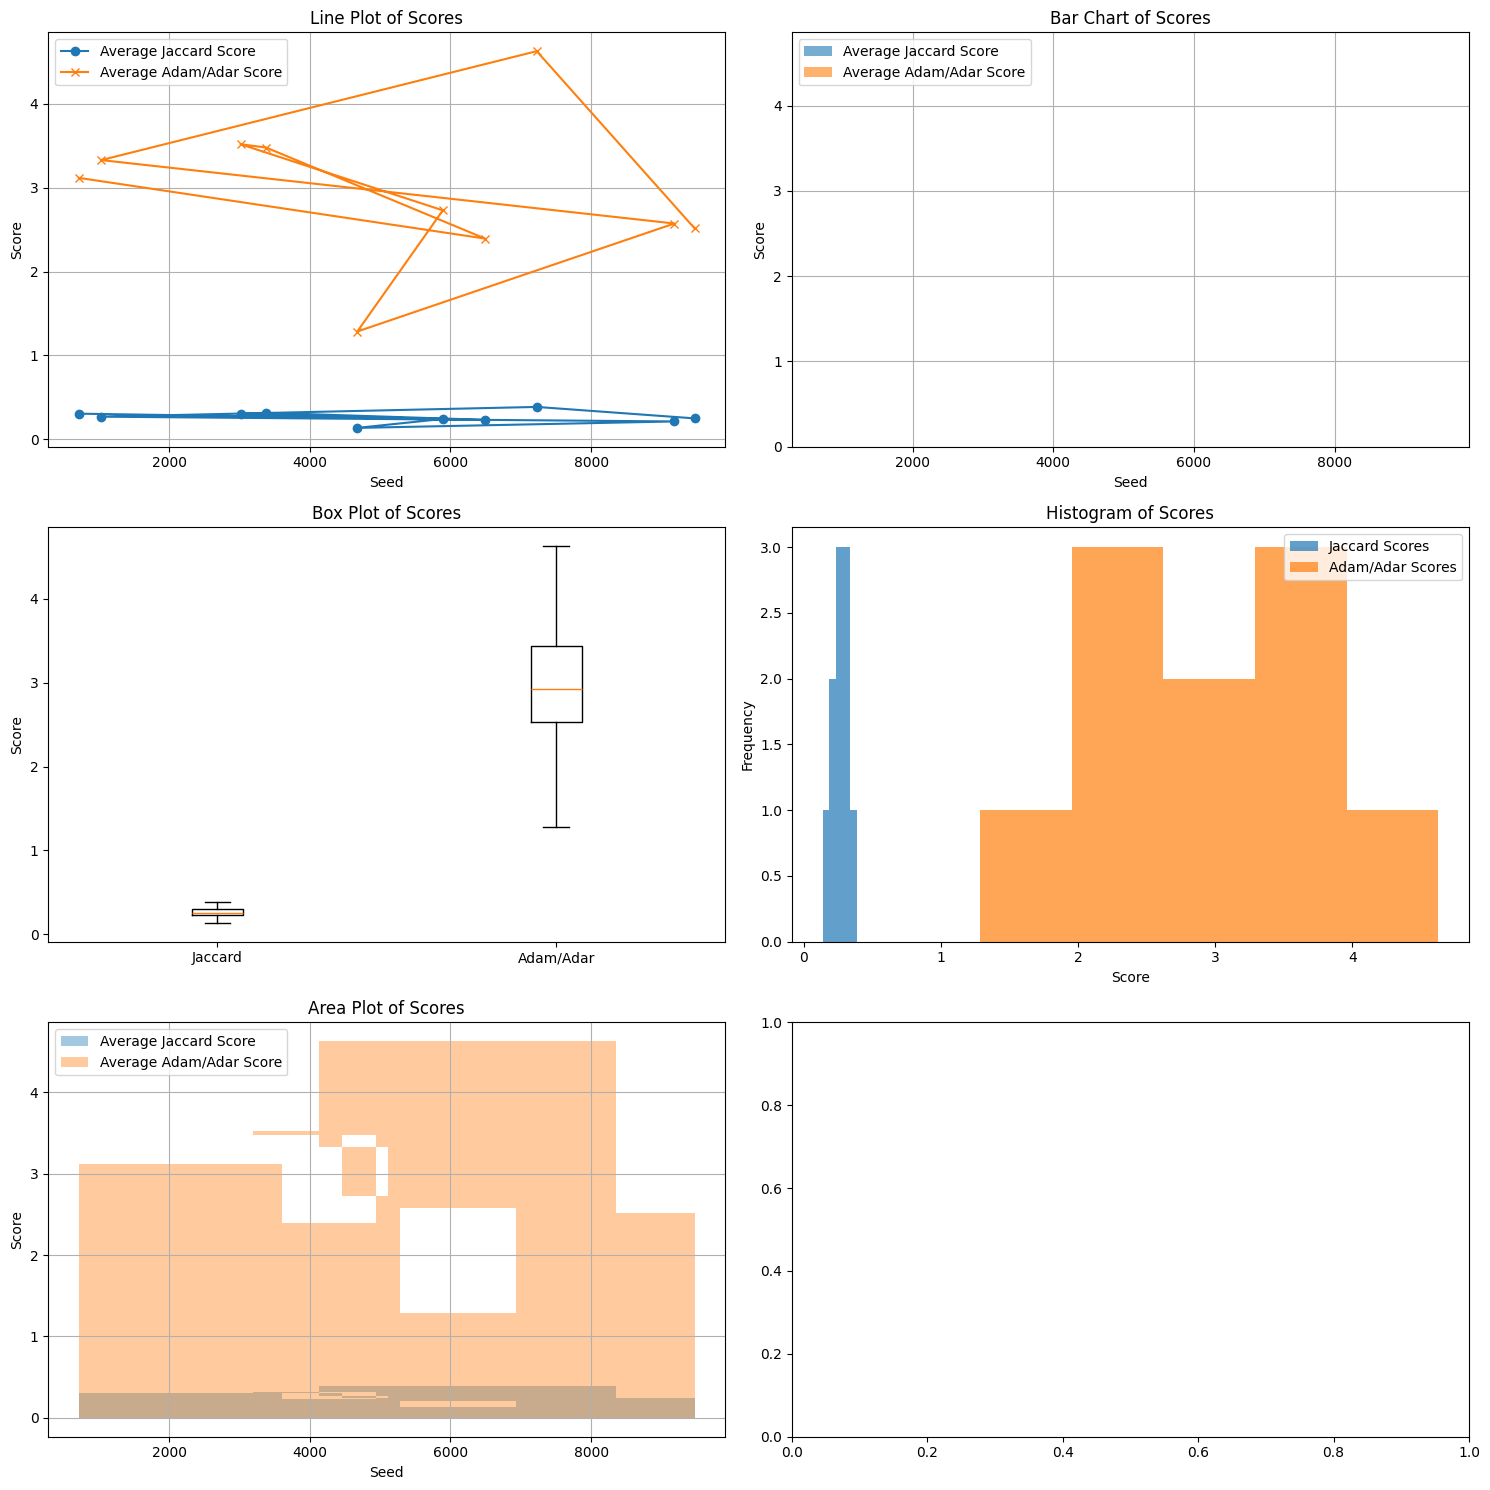

In [45]:
# Modify the plotting section to use scatter plot
# plt.figure(figsize=(10, 5))
# plt.scatter(seeds, jaccard_scores, label='Average Jaccard Score', marker='o')
# plt.scatter(seeds, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
# plt.xlabel('Seed')
# plt.ylabel('Score')
# plt.title('Average Jaccard and Adam/Adar Scores for Different Seeds')
# plt.legend()
# plt.grid(True)
# plt.show()

fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid of subplots

# Line Plot
axs[0, 0].plot(seeds, jaccard_scores, label='Average Jaccard Score', marker='o')
axs[0, 0].plot(seeds, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
axs[0, 0].set_title('Line Plot of Scores')
axs[0, 0].set_xlabel('Seed')
axs[0, 0].set_ylabel('Score')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Bar Chart
axs[0, 1].bar(seeds, jaccard_scores, label='Average Jaccard Score', alpha=0.6)
axs[0, 1].bar(seeds, adamic_adar_scores, label='Average Adam/Adar Score', alpha=0.6)
axs[0, 1].set_title('Bar Chart of Scores')
axs[0, 1].set_xlabel('Seed')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Box Plot
data = [jaccard_scores, adamic_adar_scores]
axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])
axs[1, 0].set_title('Box Plot of Scores')
axs[1, 0].set_ylabel('Score')

# Histogram
axs[1, 1].hist(jaccard_scores, bins=5, alpha=0.7, label='Jaccard Scores')
axs[1, 1].hist(adamic_adar_scores, bins=5, alpha=0.7, label='Adam/Adar Scores')
axs[1, 1].set_title('Histogram of Scores')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Area Plot
axs[2, 0].fill_between(seeds, jaccard_scores, label='Average Jaccard Score', step='mid', alpha=0.4)
axs[2, 0].fill_between(seeds, adamic_adar_scores, label='Average Adam/Adar Score', step='mid', alpha=0.4)
axs[2, 0].set_title('Area Plot of Scores')
axs[2, 0].set_xlabel('Seed')
axs[2, 0].set_ylabel('Score')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

---

In [ ]:
# import numpy as np
# import core_rec as cs
# import vish_graphs as vg
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import matplotlib.pyplot as plt
# import random
# import os
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter


# def test_scores_for_different_node_counts(node_counts, seed=23, top_k=5, num_epochs=10):
#     jaccard_scores = []
#     adamic_adar_scores = []

#     for num_nodes in node_counts:
#         # Generate random graph
#         file_path = vg.generate_random_graph(num_nodes, seed=seed)
#         adj_matrix = np.loadtxt(file_path, delimiter=",")

#         # Convert adjacency matrix to dataset
#         graph_dataset = cs.GraphDataset(adj_matrix)
#         data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)

#         # Define model parameters
#         num_layers = 2
#         d_model = 128
#         num_heads = 8
#         d_feedforward = 512
#         input_dim = len(adj_matrix[0])

#         # Initialize model, loss function, and optimizer
#         model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
#         criterion = nn.MSELoss()
#         optimizer = optim.Adam(model.parameters(), lr=0.001)

#         # Train the model
#         cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

#         # Predict recommendations for a specific node
#         node_index = 2  # target node
#         recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)

#         # Calculate scores
#         aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
#         jaccard_scores.append(aaj)
#         adamic_adar_scores.append(aaj2)

#     return jaccard_scores, adamic_adar_scores
 
# # Generate node counts from 20 to 200
# node_counts = range(20, 201, 20)

# # Test scores
# jaccard_scores, adamic_adar_scores = test_scores_for_different_node_counts(node_counts)

# # Function to format the y-axis ticks to show more decimal places
# def format_ticks(x, pos):
#     return f'{x:.2f}'  # Change '.2f' to however many decimal places you need

# # Assuming jaccard_scores and adamic_adar_scores are already computed and available
# fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # 3x2 grid of subplots

# # Line Plot
# axs[0, 0].plot(node_counts, jaccard_scores, label='Average Jaccard Score', marker='o')
# axs[0, 0].plot(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', marker='x')
# axs[0, 0].set_title('Line Plot of Scores')
# axs[0, 0].set_xlabel('Number of Nodes')
# axs[0, 0].set_ylabel('Score')
# axs[0, 0].legend()
# axs[0, 0].grid(True)
# axs[0, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Bar Chart
# axs[0, 1].bar(node_counts, jaccard_scores, label='Average Jaccard Score', alpha=0.6)
# axs[0, 1].bar(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', alpha=0.6)
# axs[0, 1].set_title('Bar Chart of Scores')
# axs[0, 1].set_xlabel('Number of Nodes')
# axs[0, 1].set_ylabel('Score')
# axs[0, 1].legend()
# axs[0, 1].grid(True)
# axs[0, 1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Box Plot
# data = [jaccard_scores, adamic_adar_scores]
# axs[1, 0].boxplot(data, labels=['Jaccard', 'Adam/Adar'])
# axs[1, 0].set_title('Box Plot of Scores')
# axs[1, 0].set_ylabel('Score')
# axs[1, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Histogram
# axs[1, 1].hist(jaccard_scores, bins=len(node_counts), alpha=0.7, label='Jaccard Scores')
# axs[1, 1].hist(adamic_adar_scores, bins=len(node_counts), alpha=0.7, label='Adam/Adar Scores')
# axs[1, 1].set_title('Histogram of Scores')
# axs[1, 1].set_xlabel('Score')
# axs[1, 1].set_ylabel('Frequency')
# axs[1, 1].legend()
# axs[1, 1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Area Plot
# axs[2, 0].fill_between(node_counts, jaccard_scores, label='Average Jaccard Score', step='mid', alpha=0.4)
# axs[2, 0].fill_between(node_counts, adamic_adar_scores, label='Average Adam/Adar Score', step='mid', alpha=0.4)
# axs[2, 0].set_title('Area Plot of Scores')
# axs[2, 0].set_xlabel('Number of Nodes')
# axs[2, 0].set_ylabel('Score')
# axs[2, 0].legend()
# axs[2, 0].grid(True)
# axs[2, 0].yaxis.set_major_formatter(FuncFormatter(format_ticks))

# # Adjust layout
# plt.tight_layout()
# plt.show()


---

Generating graph: 100%|██████████| 20/20 [00:00<00:00, 73843.38it/s]


Epoch 1/10, Loss: 0.49699729681015015
Epoch 2/10, Loss: 0.24022869765758514
Epoch 3/10, Loss: 0.11957760155200958
Epoch 4/10, Loss: 0.0825970470905304
Epoch 5/10, Loss: 0.060878049582242966
Epoch 6/10, Loss: 0.06177199259400368
Epoch 7/10, Loss: 0.06677673012018204
Epoch 8/10, Loss: 0.05590549483895302
Epoch 9/10, Loss: 0.036131445318460464
Epoch 10/10, Loss: 0.0380890853703022


Generating graph: 100%|██████████| 40/40 [00:00<00:00, 57554.77it/s]


Epoch 1/10, Loss: 0.2460324913263321
Epoch 2/10, Loss: 0.20387369394302368
Epoch 3/10, Loss: 0.1690322905778885
Epoch 4/10, Loss: 0.1931881457567215
Epoch 5/10, Loss: 0.11747894436120987
Epoch 6/10, Loss: 0.1025383397936821
Epoch 7/10, Loss: 0.09493087977170944
Epoch 8/10, Loss: 0.08639506995677948
Epoch 9/10, Loss: 0.056520719081163406
Epoch 10/10, Loss: 0.05516335368156433


Generating graph: 100%|██████████| 60/60 [00:00<00:00, 106006.00it/s]

Epoch 1/10, Loss: 0.2099202275276184


Epoch 2/10, Loss: 0.24803420901298523
Epoch 3/10, Loss: 0.20223933458328247
Epoch 4/10, Loss: 0.16853584349155426
Epoch 5/10, Loss: 0.12878486514091492
Epoch 6/10, Loss: 0.12380502372980118
Epoch 7/10, Loss: 0.09404899179935455
Epoch 8/10, Loss: 0.06266013532876968
Epoch 9/10, Loss: 0.06173005327582359
Epoch 10/10, Loss: 0.06346192210912704


Generating graph: 100%|██████████| 80/80 [00:00<00:00, 82483.85it/s]

Epoch 1/10, Loss: 0.24611610174179077


Epoch 2/10, Loss: 0.2321546971797943
Epoch 3/10, Loss: 0.16290540993213654
Epoch 4/10, Loss: 0.17526906728744507
Epoch 5/10, Loss: 0.14222615957260132
Epoch 6/10, Loss: 0.14354179799556732
Epoch 7/10, Loss: 0.1039803996682167
Epoch 8/10, Loss: 0.0736398920416832
Epoch 9/10, Loss: 0.07105167955160141
Epoch 10/10, Loss: 0.060399606823921204


Generating graph: 100%|██████████| 100/100 [00:00<00:00, 68122.53it/s]

Epoch 1/10, Loss: 0.23109577596187592
Epoch 2/10, Loss: 0.17899422347545624


Epoch 3/10, Loss: 0.13625560700893402
Epoch 4/10, Loss: 0.163222074508667
Epoch 5/10, Loss: 0.1285630464553833
Epoch 6/10, Loss: 0.11936850100755692
Epoch 7/10, Loss: 0.09238457679748535
Epoch 8/10, Loss: 0.09626215696334839
Epoch 9/10, Loss: 0.08135931193828583
Epoch 10/10, Loss: 0.0685155987739563


Generating graph: 100%|██████████| 120/120 [00:00<00:00, 44711.42it/s]

Epoch 1/10, Loss: 0.20547887682914734


Epoch 2/10, Loss: 0.22232869267463684
Epoch 3/10, Loss: 0.23712506890296936
Epoch 4/10, Loss: 0.20089389383792877
Epoch 5/10, Loss: 0.17145273089408875
Epoch 6/10, Loss: 0.13515907526016235
Epoch 7/10, Loss: 0.1372072398662567
Epoch 8/10, Loss: 0.09051923453807831
Epoch 9/10, Loss: 0.09808069467544556
Epoch 10/10, Loss: 0.07155996561050415


Generating graph: 100%|██████████| 140/140 [00:00<00:00, 47946.64it/s]

Epoch 1/10, Loss: 0.2262386828660965


Epoch 2/10, Loss: 0.171859472990036
Epoch 3/10, Loss: 0.17670677602291107
Epoch 4/10, Loss: 0.19074290990829468
Epoch 5/10, Loss: 0.14529481530189514
Epoch 6/10, Loss: 0.14645712077617645
Epoch 7/10, Loss: 0.1358405500650406
Epoch 8/10, Loss: 0.12178327143192291
Epoch 9/10, Loss: 0.09482598304748535
Epoch 10/10, Loss: 0.08065018802881241


Generating graph: 100%|██████████| 160/160 [00:00<00:00, 42608.80it/s]

Epoch 1/10, Loss: 0.17878811061382294


Epoch 2/10, Loss: 0.2256782203912735
Epoch 3/10, Loss: 0.21408586204051971
Epoch 4/10, Loss: 0.1815056949853897
Epoch 5/10, Loss: 0.1551596224308014
Epoch 6/10, Loss: 0.14459581673145294
Epoch 7/10, Loss: 0.11895033717155457
Epoch 8/10, Loss: 0.09227845072746277
Epoch 9/10, Loss: 0.1154458075761795
Epoch 10/10, Loss: 0.0831889659166336


Generating graph: 100%|██████████| 180/180 [00:00<00:00, 37831.97it/s]

Epoch 1/10, Loss: 0.19484516978263855


Epoch 2/10, Loss: 0.20813383162021637
Epoch 3/10, Loss: 0.22595874965190887
Epoch 4/10, Loss: 0.16468217968940735
Epoch 5/10, Loss: 0.16074863076210022
Epoch 6/10, Loss: 0.13900186121463776
Epoch 7/10, Loss: 0.10503479093313217
Epoch 8/10, Loss: 0.08525840193033218
Epoch 9/10, Loss: 0.09391974657773972
Epoch 10/10, Loss: 0.0627468079328537


Generating graph: 100%|██████████| 200/200 [00:00<00:00, 34771.43it/s]


Epoch 1/10, Loss: 0.18958358466625214
Epoch 2/10, Loss: 0.20869781076908112
Epoch 3/10, Loss: 0.17596524953842163
Epoch 4/10, Loss: 0.16410689055919647
Epoch 5/10, Loss: 0.15401598811149597
Epoch 6/10, Loss: 0.15724201500415802
Epoch 7/10, Loss: 0.13473352789878845
Epoch 8/10, Loss: 0.09888296574354172
Epoch 9/10, Loss: 0.09814868122339249
Epoch 10/10, Loss: 0.08925685286521912


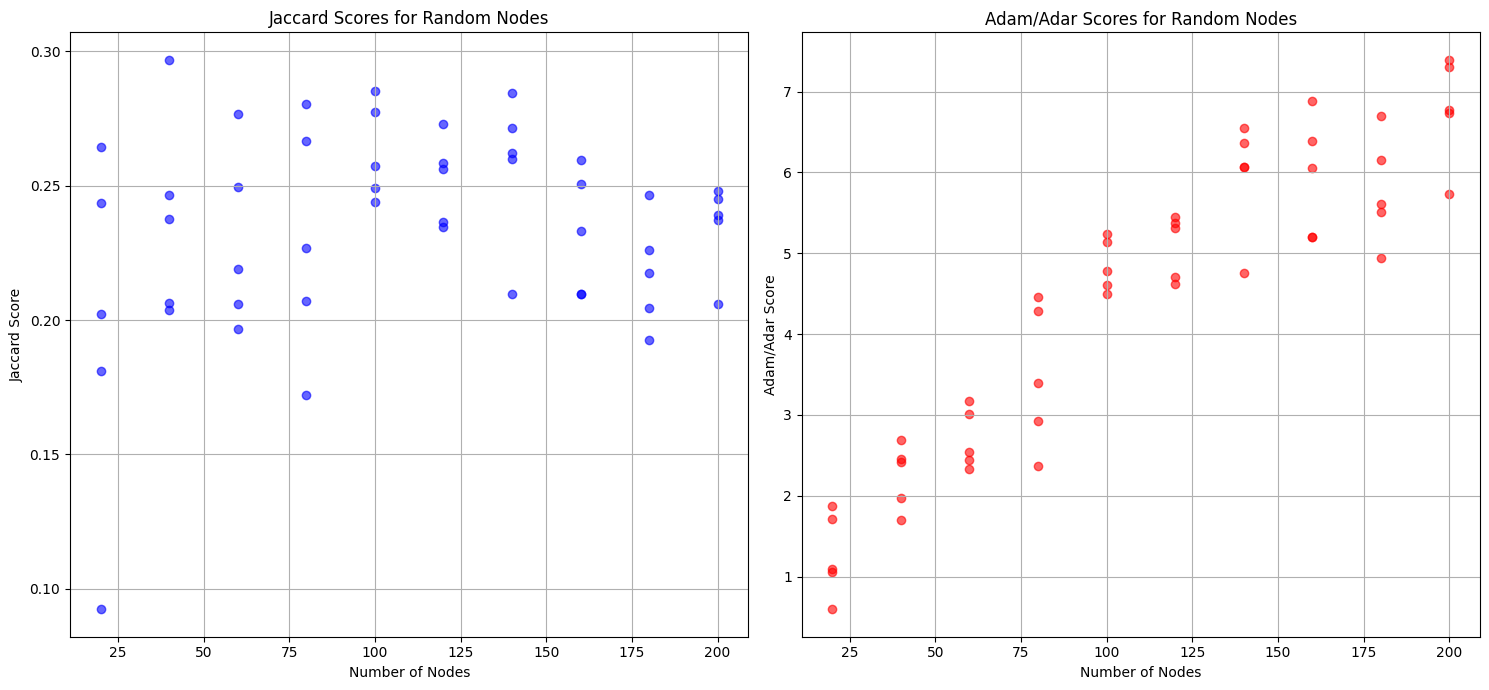

In [46]:


import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from matplotlib.ticker import FuncFormatter

def test_scores_for_random_nodes(node_counts, num_random_nodes=5, top_k=5, num_epochs=10, seed=23):
    jaccard_scores = []
    adamic_adar_scores = []
    nodes_selected = []

    for num_nodes in node_counts:
        file_path = vg.generate_random_graph(num_nodes, seed=seed)
        adj_matrix = np.loadtxt(file_path, delimiter=",")
        graph_dataset = cs.GraphDataset(adj_matrix)
        data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
        num_layers = 2
        d_model = 128
        num_heads = 8
        d_feedforward = 512
        input_dim = len(adj_matrix[0])
        model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

        for _ in range(num_random_nodes):
            node_index = random.randint(0, num_nodes - 1)
            recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
            aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
            jaccard_scores.append(aaj)
            adamic_adar_scores.append(aaj2)
            nodes_selected.append((num_nodes, node_index))

    return nodes_selected, jaccard_scores, adamic_adar_scores

# Generate node counts from 20 to 200
node_counts = range(20, 201, 20)

# Test scores
nodes_selected, jaccard_scores, adamic_adar_scores = test_scores_for_random_nodes(node_counts)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Scatter plot for Jaccard Scores
axs[0].scatter([n[0] for n in nodes_selected], jaccard_scores, c='blue', label='Jaccard Scores', alpha=0.6)
axs[0].set_title('Jaccard Scores for Random Nodes')
axs[0].set_xlabel('Number of Nodes')
axs[0].set_ylabel('Jaccard Score')
axs[0].grid(True)

# Scatter plot for Adam/Adar Scores
axs[1].scatter([n[0] for n in nodes_selected], adamic_adar_scores, c='red', label='Adam/Adar Scores', alpha=0.6)
axs[1].set_title('Adam/Adar Scores for Random Nodes')
axs[1].set_xlabel('Number of Nodes')
axs[1].set_ylabel('Adam/Adar Score')
axs[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

---

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 16203.82it/s]

Epoch 1/10, Loss: 0.18352901935577393
Epoch 2/10, Loss: 0.1873670518398285
Epoch 3/10, Loss: 0.17284590005874634
Epoch 4/10, Loss: 0.1197550892829895
Epoch 5/10, Loss: 0.15115876495838165
Epoch 6/10, Loss: 0.13214652240276337
Epoch 7/10, Loss: 0.0978437066078186
Epoch 8/10, Loss: 0.10232065618038177
Epoch 9/10, Loss: 0.10381779074668884
Epoch 10/10, Loss: 0.07777182012796402


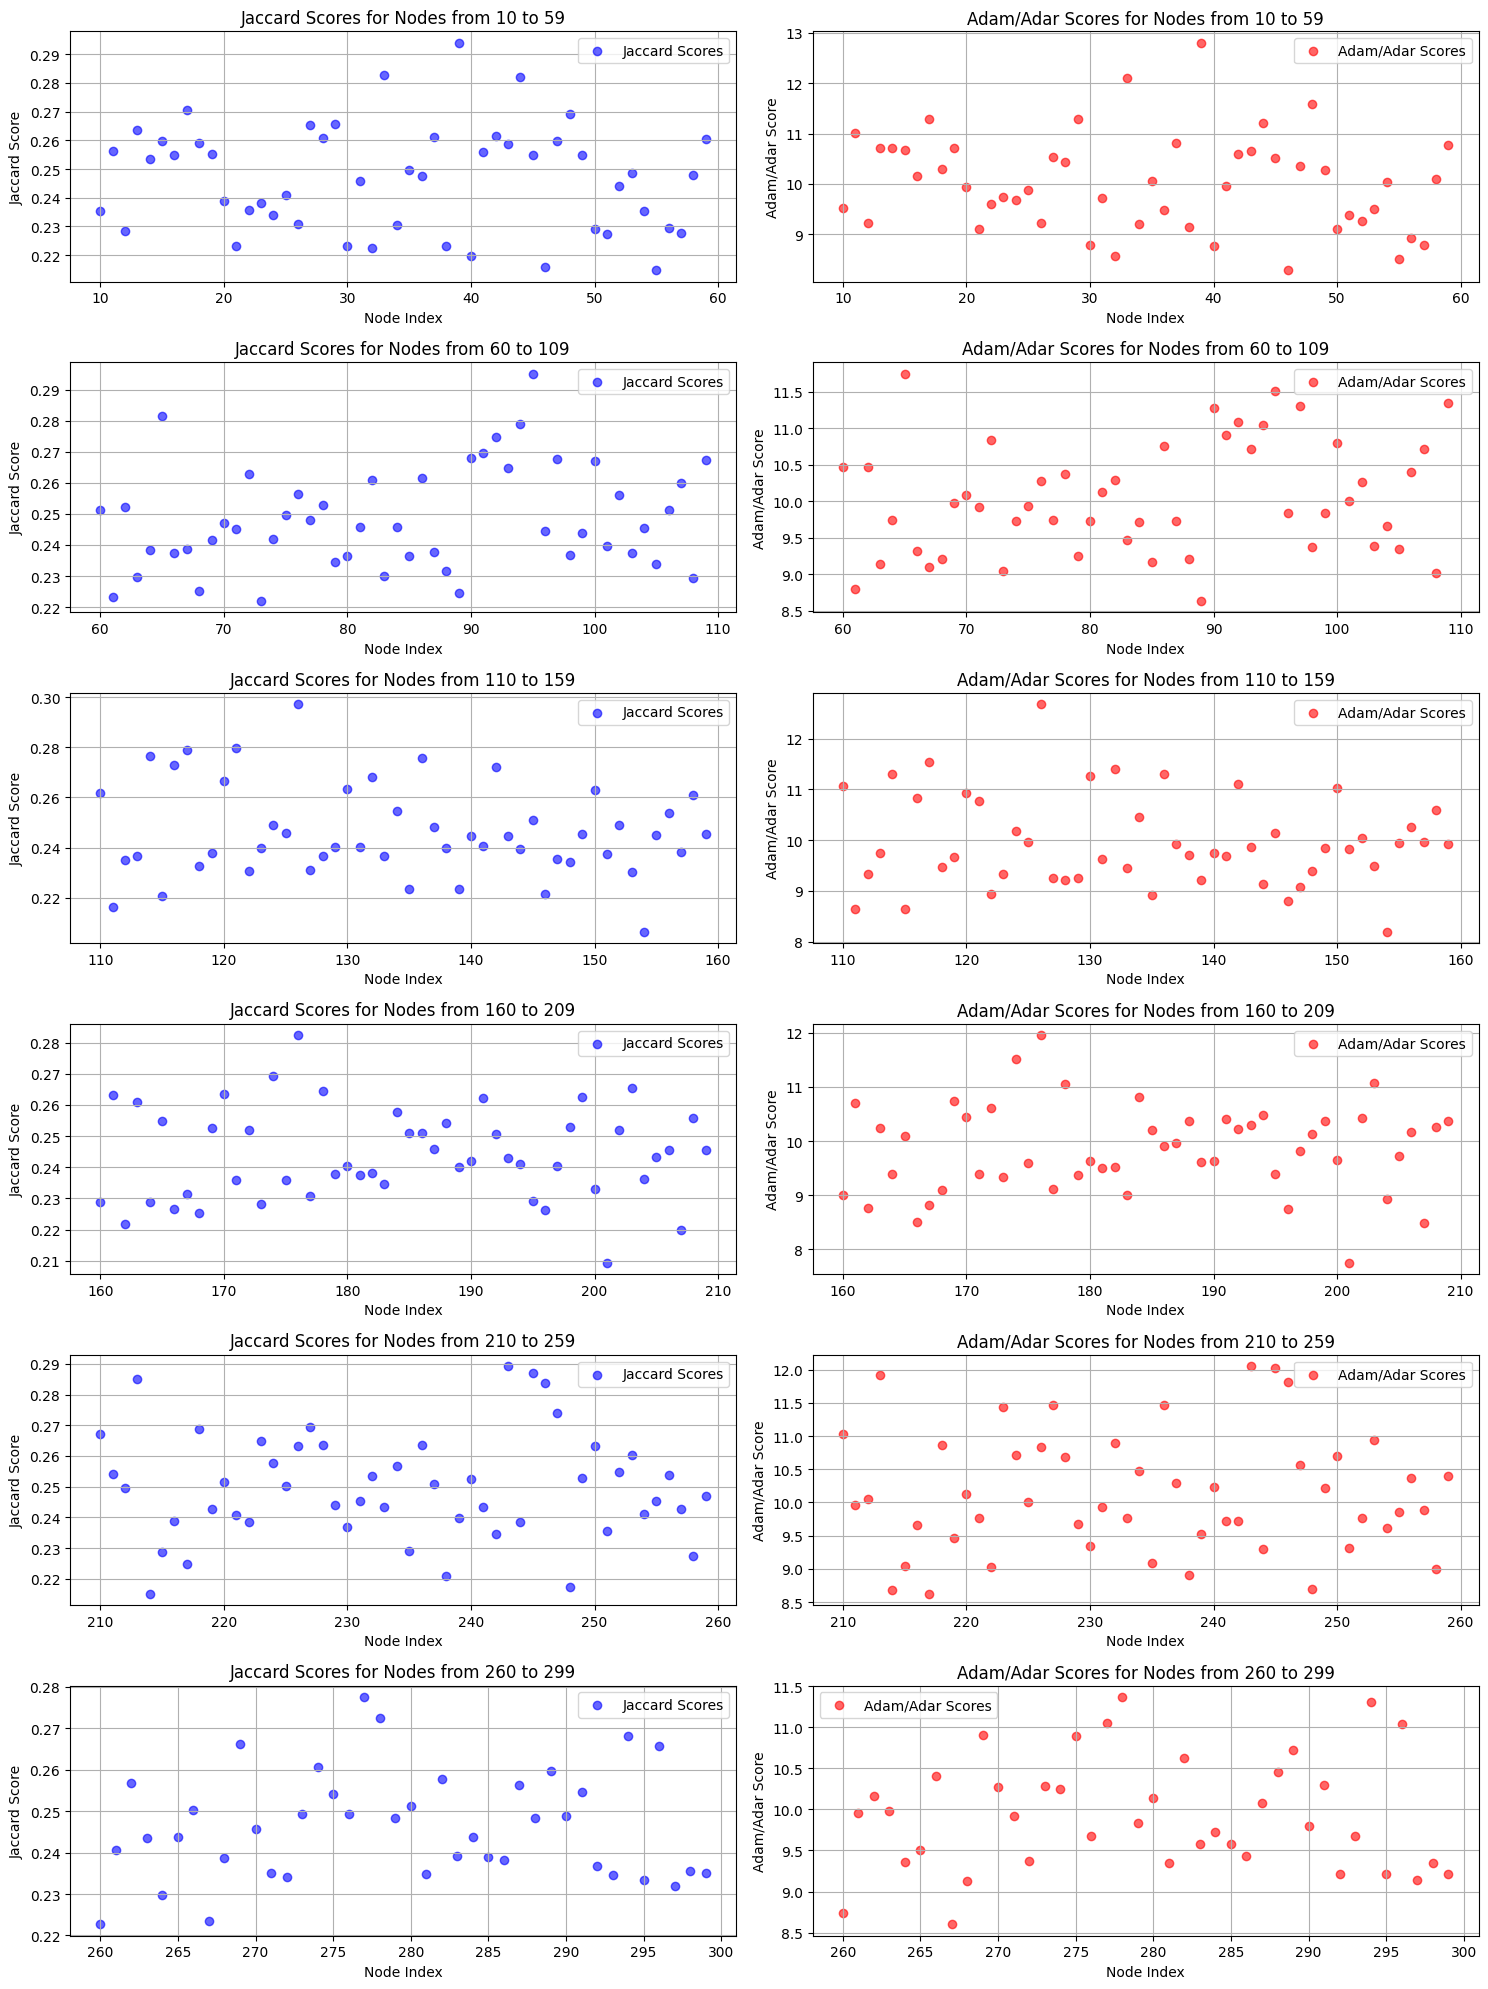

In [47]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from matplotlib.ticker import FuncFormatter

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=10, seed=23):
    jaccard_scores = []
    adamic_adar_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 8
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        aaj, aaj2 = cs.aaj_accuracy(adj_matrix, node_index, recommended_nodes)
        jaccard_scores.append(aaj)
        adamic_adar_scores.append(aaj2)

    return node_indices, jaccard_scores, adamic_adar_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, jaccard_scores, adamic_adar_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Define ranges for drilling down
ranges = [(10, 60), (60, 110), (110, 160), (160, 210), (210, 260), (260, 300)]

# Plotting
fig, axs = plt.subplots(len(ranges), 2, figsize=(15, 20))

for i, (start, end) in enumerate(ranges):
    range_indices = range(start, end)
    range_jaccard_scores = jaccard_scores[start-10:end-10]
    range_adamic_adar_scores = adamic_adar_scores[start-10:end-10]

    # Scatter plot for Jaccard Scores
    axs[i, 0].scatter(range_indices, range_jaccard_scores, c='blue', label='Jaccard Scores', alpha=0.6)
    axs[i, 0].set_title(f'Jaccard Scores for Nodes from {start} to {end-1}')
    axs[i, 0].set_xlabel('Node Index')
    axs[i, 0].set_ylabel('Jaccard Score')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Scatter plot for Adam/Adar Scores
    axs[i, 1].scatter(range_indices, range_adamic_adar_scores, c='red', label='Adam/Adar Scores', alpha=0.6)
    axs[i, 1].set_title(f'Adam/Adar Scores for Nodes from {start} to {end-1}')
    axs[i, 1].set_xlabel('Node Index')
    axs[i, 1].set_ylabel('Adam/Adar Score')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

---

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 21117.58it/s]


Epoch 1/10, Loss: 0.18924085795879364
Epoch 2/10, Loss: 0.17172123491764069
Epoch 3/10, Loss: 0.2161949723958969
Epoch 4/10, Loss: 0.16543175280094147
Epoch 5/10, Loss: 0.16274192929267883
Epoch 6/10, Loss: 0.1348440796136856
Epoch 7/10, Loss: 0.09052474051713943
Epoch 8/10, Loss: 0.11207452416419983
Epoch 9/10, Loss: 0.08666563779115677
Epoch 10/10, Loss: 0.08550705015659332


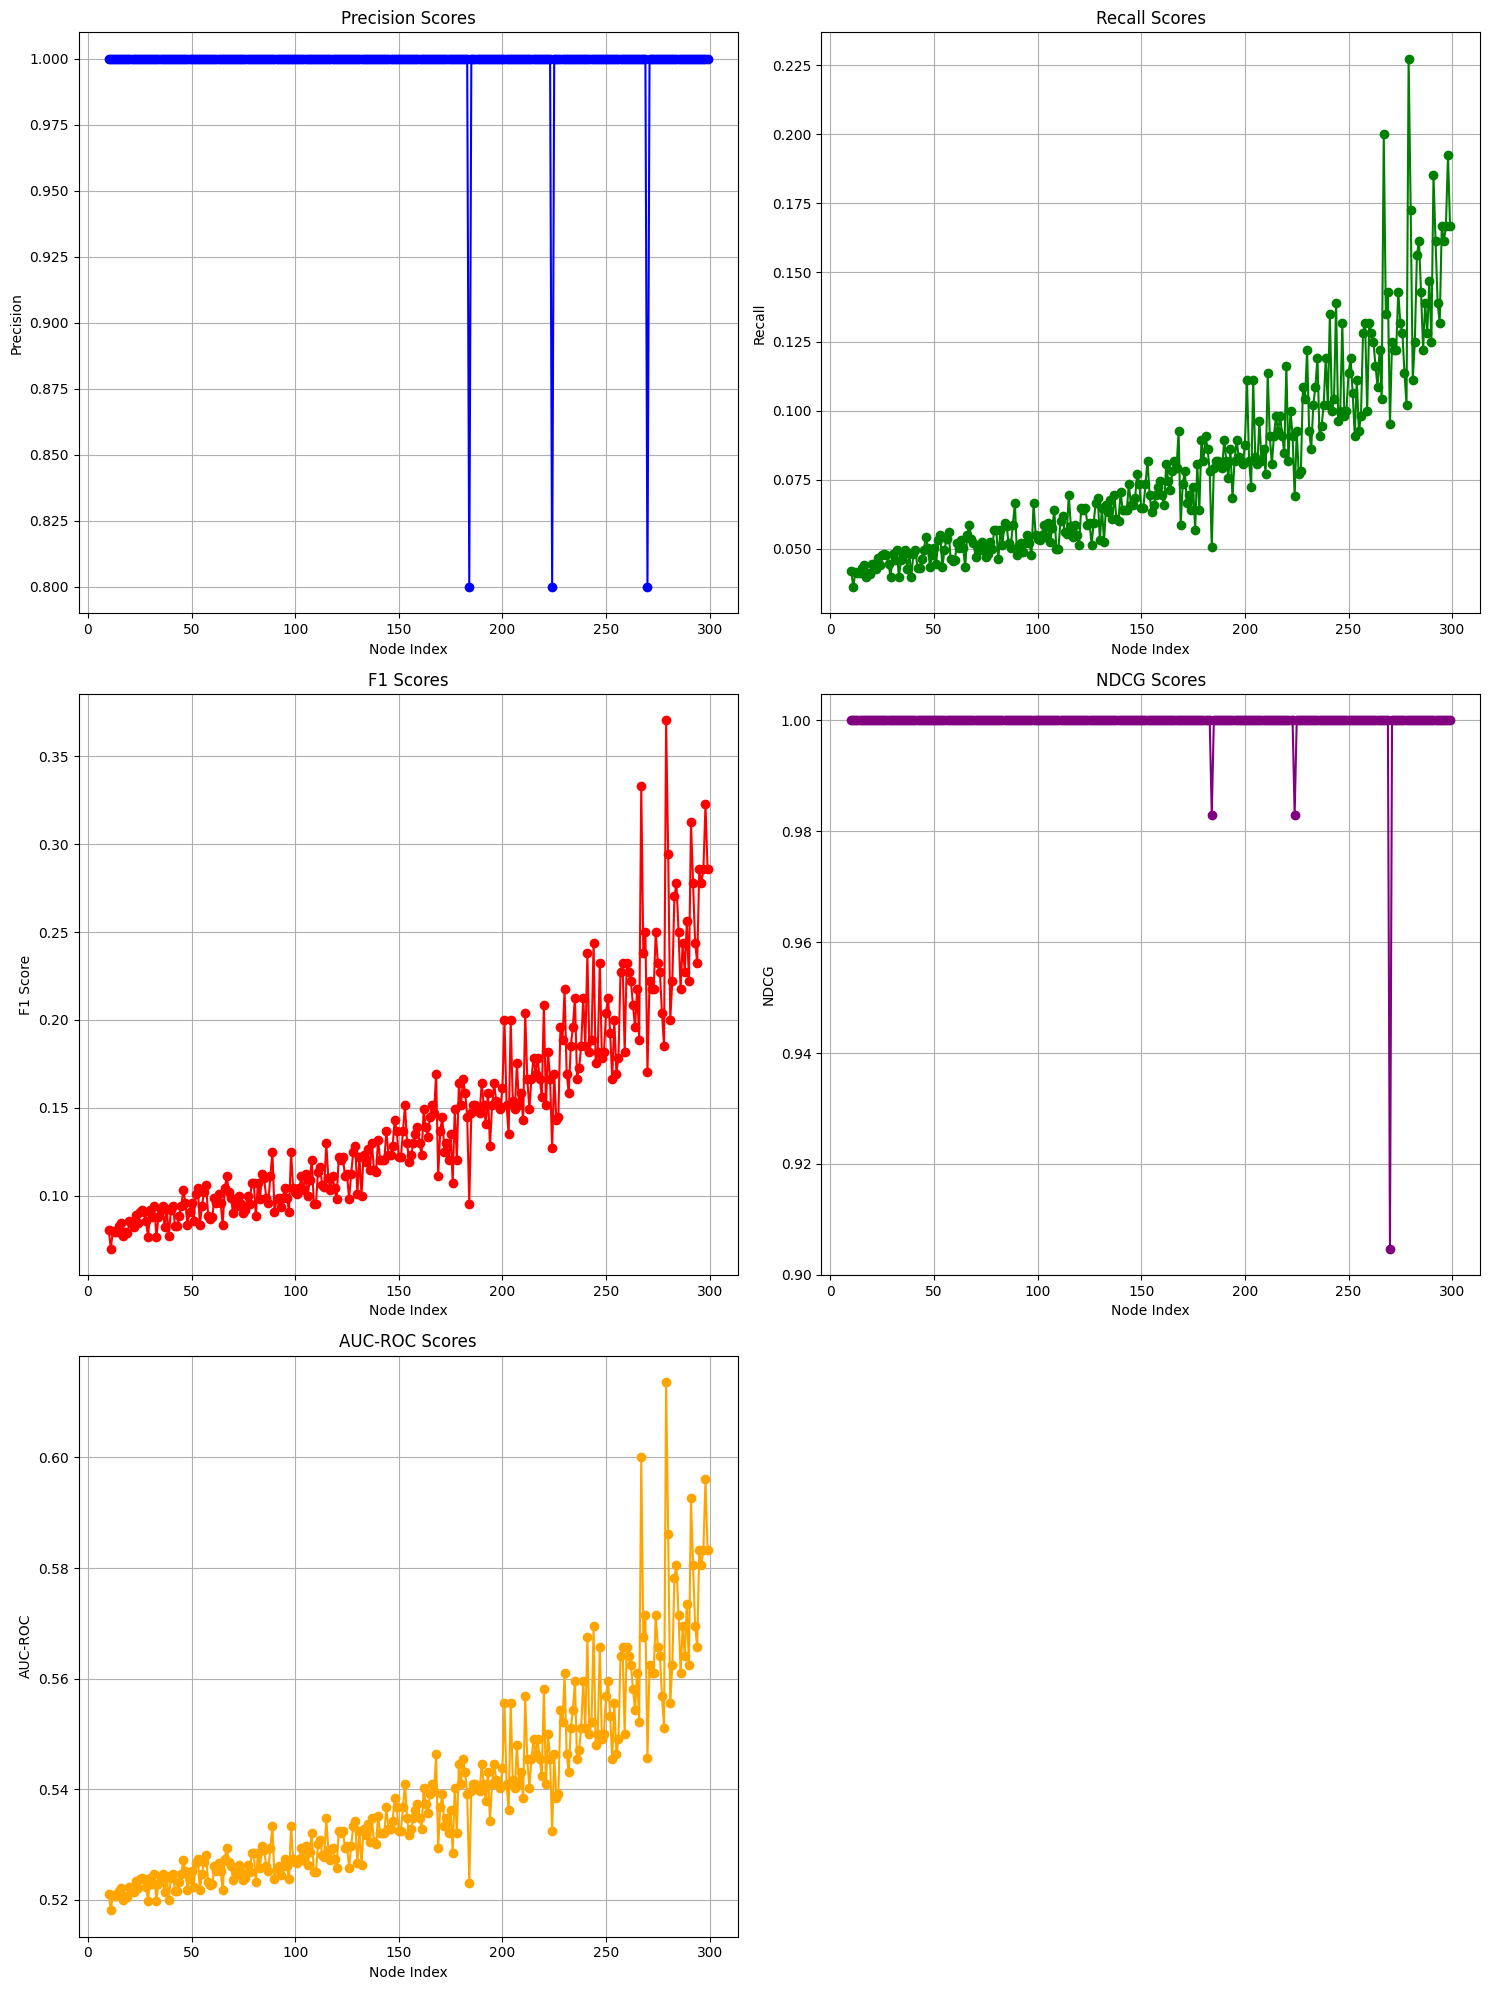

In [ ]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, roc_auc_score

def evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k=5):
    true_neighbors = set(np.where(adj_matrix[node_index] > 0)[0])
    recommended_set = set(recommended_nodes)
    
    # Precision, Recall, F1 Score
    precision = len(true_neighbors & recommended_set) / len(recommended_set)
    recall = len(true_neighbors & recommended_set) / len(true_neighbors)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # NDCG
    relevance = [1 if i in true_neighbors else 0 for i in recommended_nodes]
    ndcg = ndcg_score([relevance], [list(range(len(relevance)))])
    
    # AUC-ROC
    y_true = [1 if i in true_neighbors else 0 for i in range(len(adj_matrix))]
    y_scores = [1 if i in recommended_set else 0 for i in range(len(adj_matrix))]
    auc_roc = roc_auc_score(y_true, y_scores)
    
    return precision, recall, f1, ndcg, auc_roc

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=10, seed=23):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    ndcg_scores = []
    auc_roc_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 8
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        precision, recall, f1, ndcg, auc_roc = evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        ndcg_scores.append(ndcg)
        auc_roc_scores.append(auc_roc)

    return node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Generating graph: 100%|██████████| 300/300 [00:00<00:00, 17967.63it/s]

Epoch 1/100, Loss: 0.19884079694747925
Epoch 2/100, Loss: 0.2129063755273819
Epoch 3/100, Loss: 0.14598917961120605
Epoch 4/100, Loss: 0.133974090218544
Epoch 5/100, Loss: 0.1361970603466034
Epoch 6/100, Loss: 0.1555459350347519
Epoch 7/100, Loss: 0.1298975795507431
Epoch 8/100, Loss: 0.10082469880580902
Epoch 9/100, Loss: 0.0882907509803772
Epoch 10/100, Loss: 0.0930972769856453
Epoch 11/100, Loss: 0.06917305290699005
Epoch 12/100, Loss: 0.07788678258657455
Epoch 13/100, Loss: 0.07103093713521957
Epoch 14/100, Loss: 0.06242571026086807
Epoch 15/100, Loss: 0.06606148928403854
Epoch 16/100, Loss: 0.05522990599274635
Epoch 17/100, Loss: 0.05390860140323639
Epoch 18/100, Loss: 0.05444035679101944
Epoch 19/100, Loss: 0.04709627106785774
Epoch 20/100, Loss: 0.05428018793463707
Epoch 21/100, Loss: 0.04424358531832695
Epoch 22/100, Loss: 0.047137025743722916
Epoch 23/100, Loss: 0.04202171415090561
Epoch 24/100, Loss: 0.03730807080864906
Epoch 25/100, Loss: 0.04379010945558548
Epoch 26/100, Lo

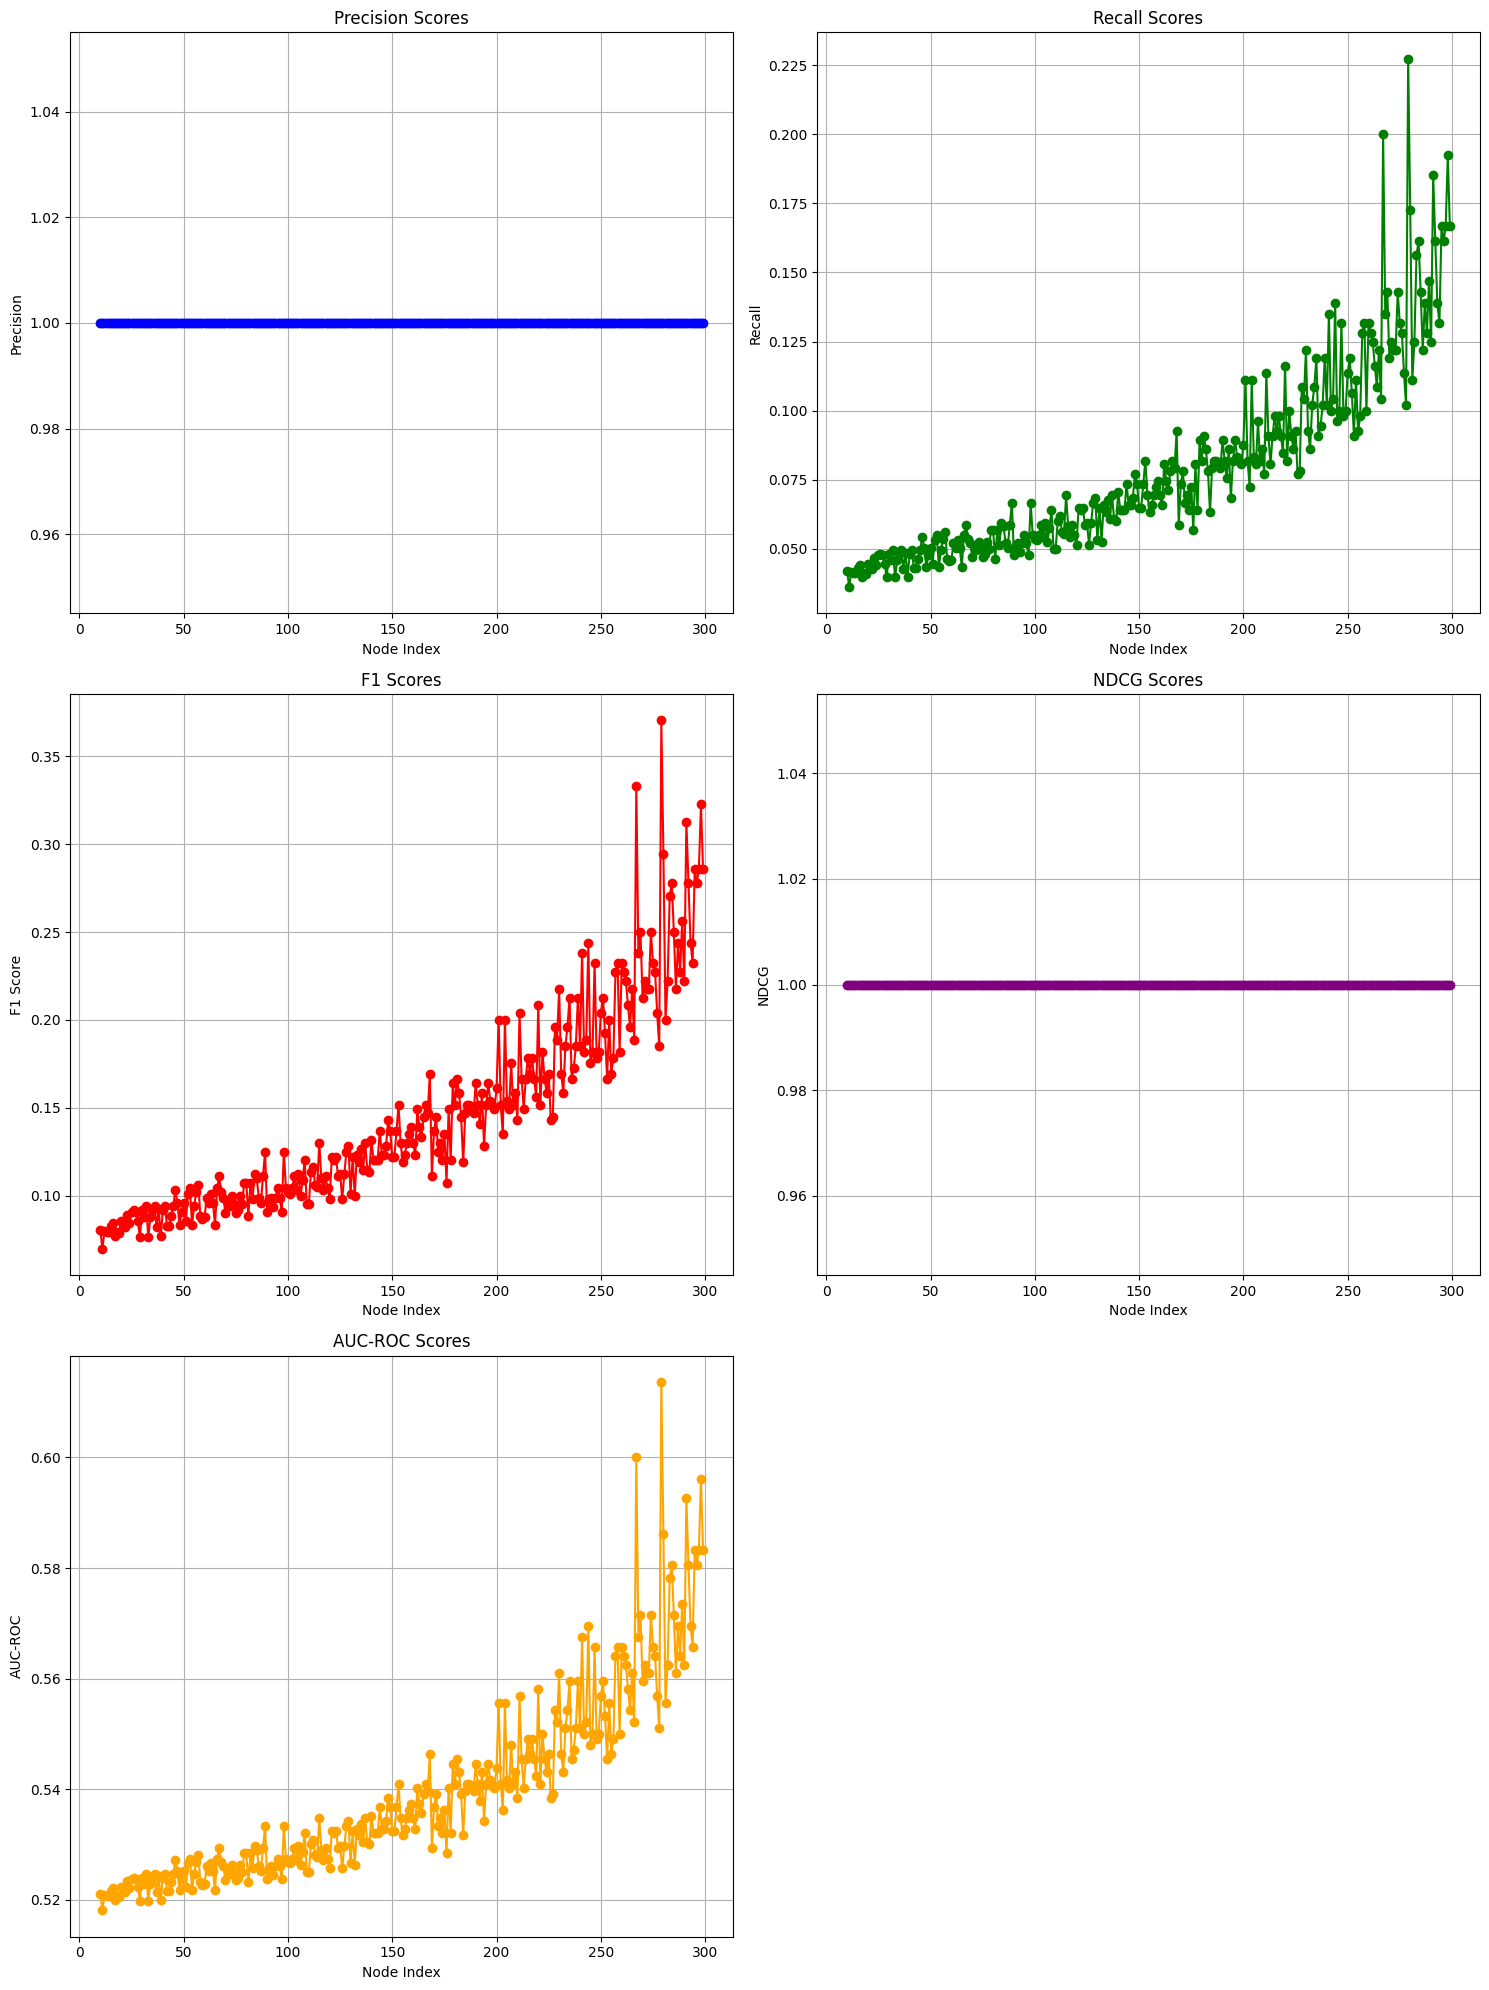

In [52]:
import numpy as np
import core_rec as cs
import vish_graphs as vg
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, roc_auc_score

def evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k=5):
    true_neighbors = set(np.where(adj_matrix[node_index] > 0)[0])
    recommended_set = set(recommended_nodes)
    
    # Precision, Recall, F1 Score
    precision = len(true_neighbors & recommended_set) / len(recommended_set)
    recall = len(true_neighbors & recommended_set) / len(true_neighbors)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # NDCG
    relevance = [1 if i in true_neighbors else 0 for i in recommended_nodes]
    ndcg = ndcg_score([relevance], [list(range(len(relevance)))])
    
    # AUC-ROC
    y_true = [1 if i in true_neighbors else 0 for i in range(len(adj_matrix))]
    y_scores = [1 if i in recommended_set else 0 for i in range(len(adj_matrix))]
    auc_roc = roc_auc_score(y_true, y_scores)
    
    return precision, recall, f1, ndcg, auc_roc

def test_scores_for_nodes_range(num_nodes, start_node, end_node, top_k=5, num_epochs=100, seed=23):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    ndcg_scores = []
    auc_roc_scores = []
    node_indices = range(start_node, end_node + 1)

    # Generate random graph
    file_path = vg.generate_random_graph(num_nodes, seed=seed)
    adj_matrix = np.loadtxt(file_path, delimiter=",")
    graph_dataset = cs.GraphDataset(adj_matrix)
    data_loader = DataLoader(graph_dataset, batch_size=5, shuffle=True)
    num_layers = 2
    d_model = 128
    num_heads = 64
    d_feedforward = 512
    input_dim = len(adj_matrix[0])
    model = cs.GraphTransformer(num_layers, d_model, num_heads, d_feedforward, input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    cs.train_model(model, data_loader, criterion, optimizer, num_epochs)

    for node_index in node_indices:
        recommended_nodes = cs.predict(model, adj_matrix, node_index, top_k=top_k)
        precision, recall, f1, ndcg, auc_roc = evaluate_recommendations(adj_matrix, node_index, recommended_nodes, top_k)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        ndcg_scores.append(ndcg)
        auc_roc_scores.append(auc_roc)

    return node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores

# Number of nodes in the graph
num_nodes = 300
# Node index range to test
start_node = 10
end_node = 300

# Test scores
node_indices, precision_scores, recall_scores, f1_scores, ndcg_scores, auc_roc_scores = test_scores_for_nodes_range(num_nodes, start_node, end_node - 1)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Conclusion

Let's analyze each graph to evaluate the performance of your recommendation model:

1. **Precision Scores**:
   - The precision scores are mostly at 1.0, indicating that when the model makes a recommendation, it is highly likely to be correct.
   - However, there are a few drops in precision, which might indicate some outliers or specific nodes where the model's performance is not as good.

2. **Recall Scores**:
   - The recall scores show a gradual increase as the node index increases.
   - This suggests that the model is able to identify more relevant items for nodes with higher indices.
   - The overall recall values are relatively low, indicating that while the model's recommendations are precise, it might not be capturing all relevant items.

3. **F1 Scores**:
   - The F1 scores, which combine precision and recall, show a similar increasing trend as the recall scores.
   - This indicates that the model's overall performance improves for nodes with higher indices.
   - The F1 scores are still relatively low, suggesting room for improvement in balancing precision and recall.

4. **NDCG Scores**:
   - The NDCG scores are mostly at 1.0, indicating that the model's recommendations are highly relevant and well-ranked.
   - There are a few drops, similar to the precision scores, which might indicate specific nodes where the model's ranking is not as effective.

5. **AUC-ROC Scores**:
   - The AUC-ROC scores show a gradual increase, similar to the recall and F1 scores.
   - This indicates that the model's ability to distinguish between relevant and non-relevant items improves for nodes with higher indices.
   - The AUC-ROC scores are relatively moderate, suggesting that the model's overall discriminative ability is decent but could be improved.

### Wrapping it up:
- **Strengths**:
  - The model has high precision and NDCG scores, indicating that the recommendations it makes are highly relevant and well-ranked.
  - The increasing trend in recall, F1, and AUC-ROC scores suggests that the model performs better for nodes with higher indices.

- **Weaknesses**:
  - The recall and F1 scores are relatively low, indicating that the model might not be capturing all relevant items.
  - The drops in precision and NDCG scores for certain nodes suggest that there are specific cases where the model's performance is not as good.

### Recommendations:
1. **Improve Recall**: Consider techniques to improve recall, such as increasing the diversity of recommendations or using more sophisticated algorithms to capture more relevant items.
2. **Analyze Outliers**: Investigate the nodes where precision and NDCG scores drop to understand why the model's performance is lower for these cases.
3. **Model Tuning**: Experiment with different hyperparameters, architectures, or additional features to improve the overall performance of the model.

Overall, while the model shows strong precision and ranking performance, there is room for improvement in recall and overall balance between precision and recall.

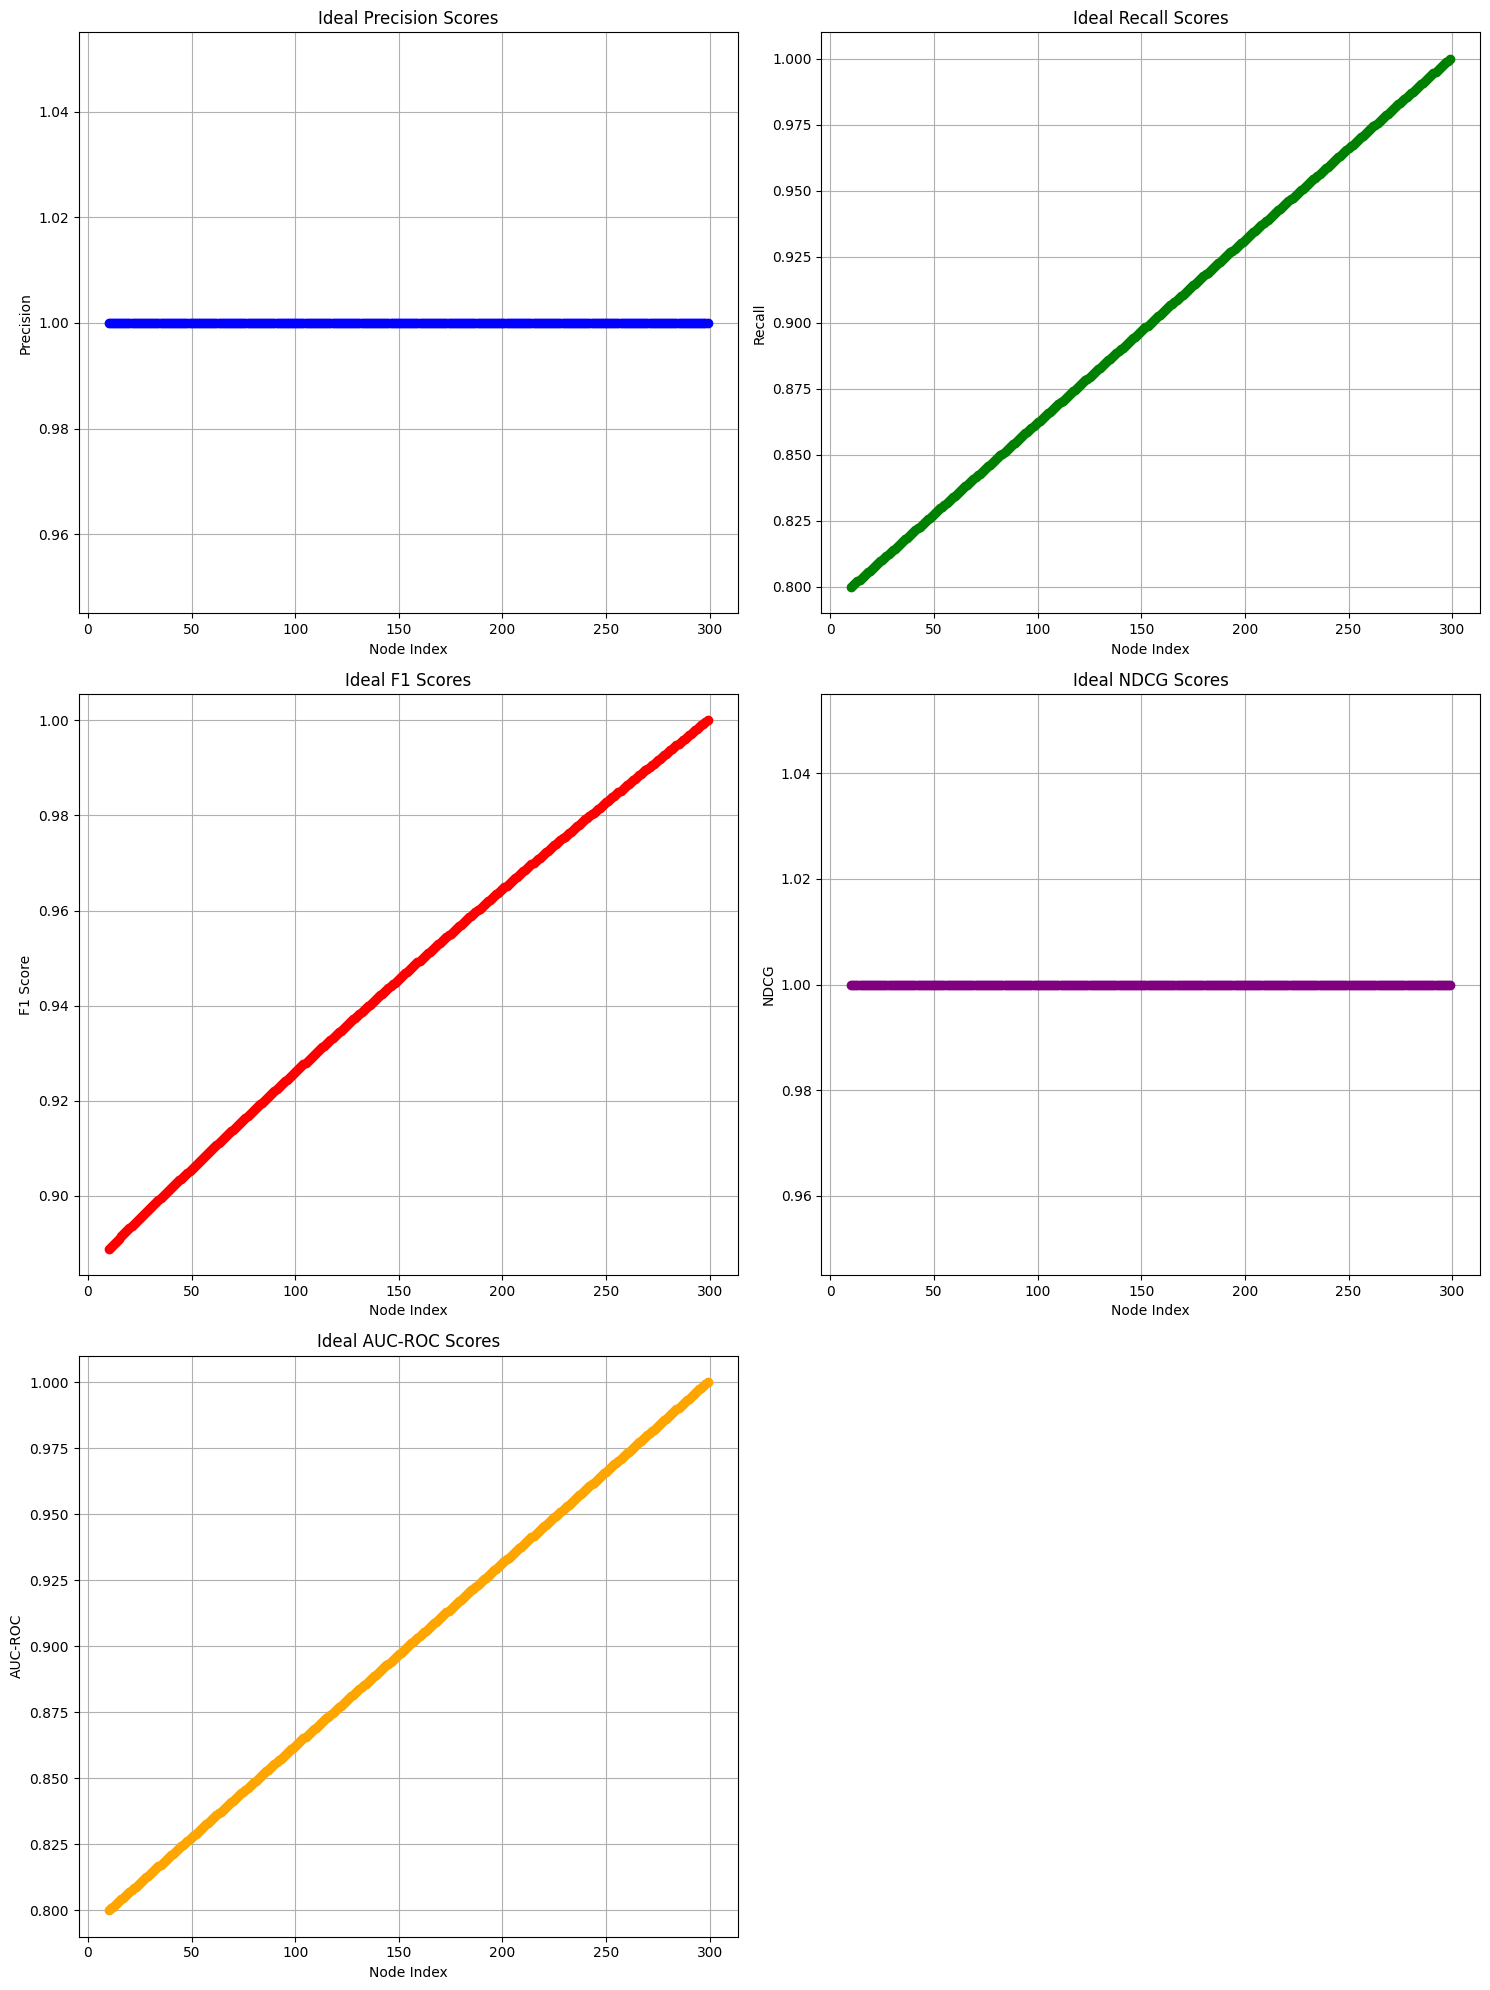

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate ideal data
np.random.seed(42)
node_indices = np.arange(10, 300)
precision_scores = np.ones_like(node_indices, dtype=float)
recall_scores = np.linspace(0.8, 1.0, len(node_indices))
f1_scores = 2 * (precision_scores * recall_scores) / (precision_scores + recall_scores)
ndcg_scores = np.ones_like(node_indices, dtype=float)
auc_roc_scores = np.linspace(0.8, 1.0, len(node_indices))

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Precision
axs[0, 0].plot(node_indices, precision_scores, label='Precision', marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Ideal Precision Scores')
axs[0, 0].set_xlabel('Node Index')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(node_indices, recall_scores, label='Recall', marker='o', linestyle='-', color='green')
axs[0, 1].set_title('Ideal Recall Scores')
axs[0, 1].set_xlabel('Node Index')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(node_indices, f1_scores, label='F1 Score', marker='o', linestyle='-', color='red')
axs[1, 0].set_title('Ideal F1 Scores')
axs[1, 0].set_xlabel('Node Index')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].grid(True)

# NDCG
axs[1, 1].plot(node_indices, ndcg_scores, label='NDCG', marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('Ideal NDCG Scores')
axs[1, 1].set_xlabel('Node Index')
axs[1, 1].set_ylabel('NDCG')
axs[1, 1].grid(True)

# AUC-ROC
axs[2, 0].plot(node_indices, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-', color='orange')
axs[2, 0].set_title('Ideal AUC-ROC Scores')
axs[2, 0].set_xlabel('Node Index')
axs[2, 0].set_ylabel('AUC-ROC')
axs[2, 0].grid(True)

# Hide the empty subplot (2, 1)
fig.delaxes(axs[2, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()